In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df[(df['chol']>300)&(df['age']>40)].shape

(42, 14)

In [5]:
f=df[(df['thal']==2)]

In [6]:
f.shape

(166, 14)

In [7]:
f[f['target']==1].shape

(130, 14)

Text(0.5, 1.0, 'Age distribuition')

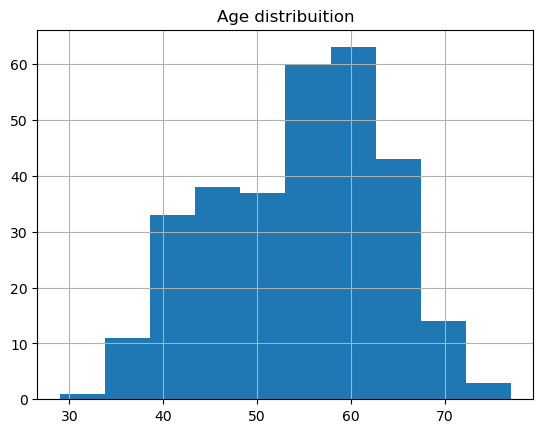

In [8]:
df['age'].hist(grid=True, bins=10) 
plt.title('Age distribuition')

C:\Users\hp\AppData\Local\Temp\ipykernel_14176\3208194670.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

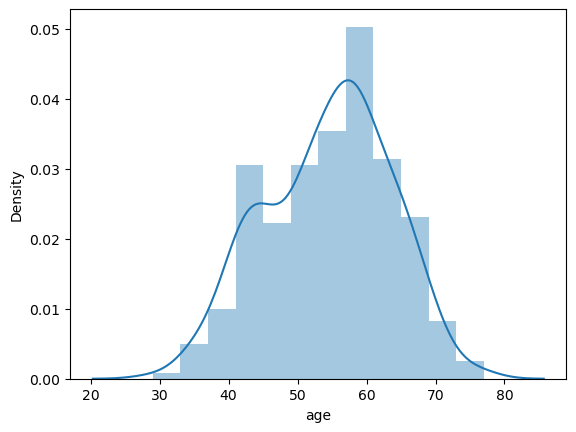

In [10]:
import seaborn as sns
sns.distplot(df['age'])

C:\Users\hp\AppData\Local\Temp\ipykernel_14176\1064537743.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],label='male')
C:\Users\hp\AppData\Local\Temp\ipykernel_14176\1064537743.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'],label='female'

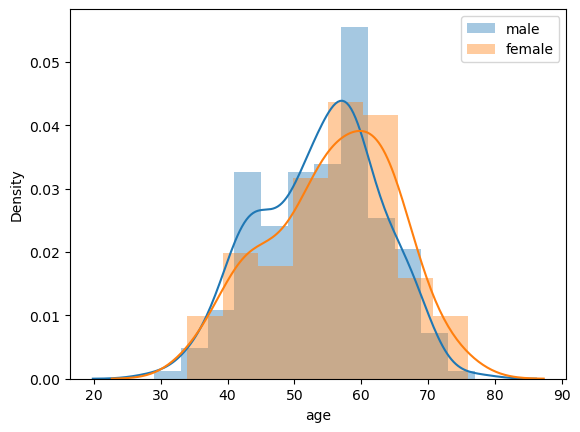

In [17]:
sns.distplot(df[df['sex']==1]['age'],label='male')
sns.distplot(df[df['sex']==0]['age'],label='female')
plt.legend()
plt.show()

<Axes: >

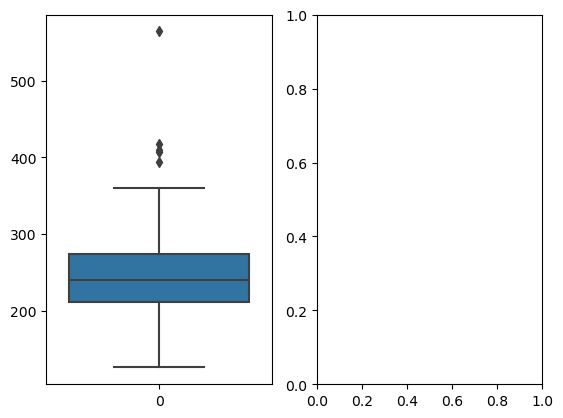

In [22]:
fig,ax1=plt.subplots(nrows=1,ncols=2)
sns.boxplot(df['chol'],ax=ax1[0])

In [9]:
X=df.iloc[:,:-1]
y=df['target']

In [10]:
print(X.shape)

(303, 13)


In [11]:
print(y.shape)

(303,)


In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=34, train_size=0.7)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [13]:
clf=tree.DecisionTreeClassifier()

In [14]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
y_test_pred=clf.predict(x_test)

In [16]:
y_train_pred=clf.predict(x_train)

In [17]:
print(f' accuracy score {accuracy_score(y_test_pred,y_test)}')

 accuracy score 0.8241758241758241


In [18]:
accuracy_score(y_train,y_train_pred)

1.0

In [19]:
confusion_matrix(y_test_pred,y_test)

array([[32,  8],
       [ 8, 43]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        40
           1       0.84      0.84      0.84        51

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [21]:
42/(42+9)

0.8235294117647058

In [22]:
42/(42+8)

0.84

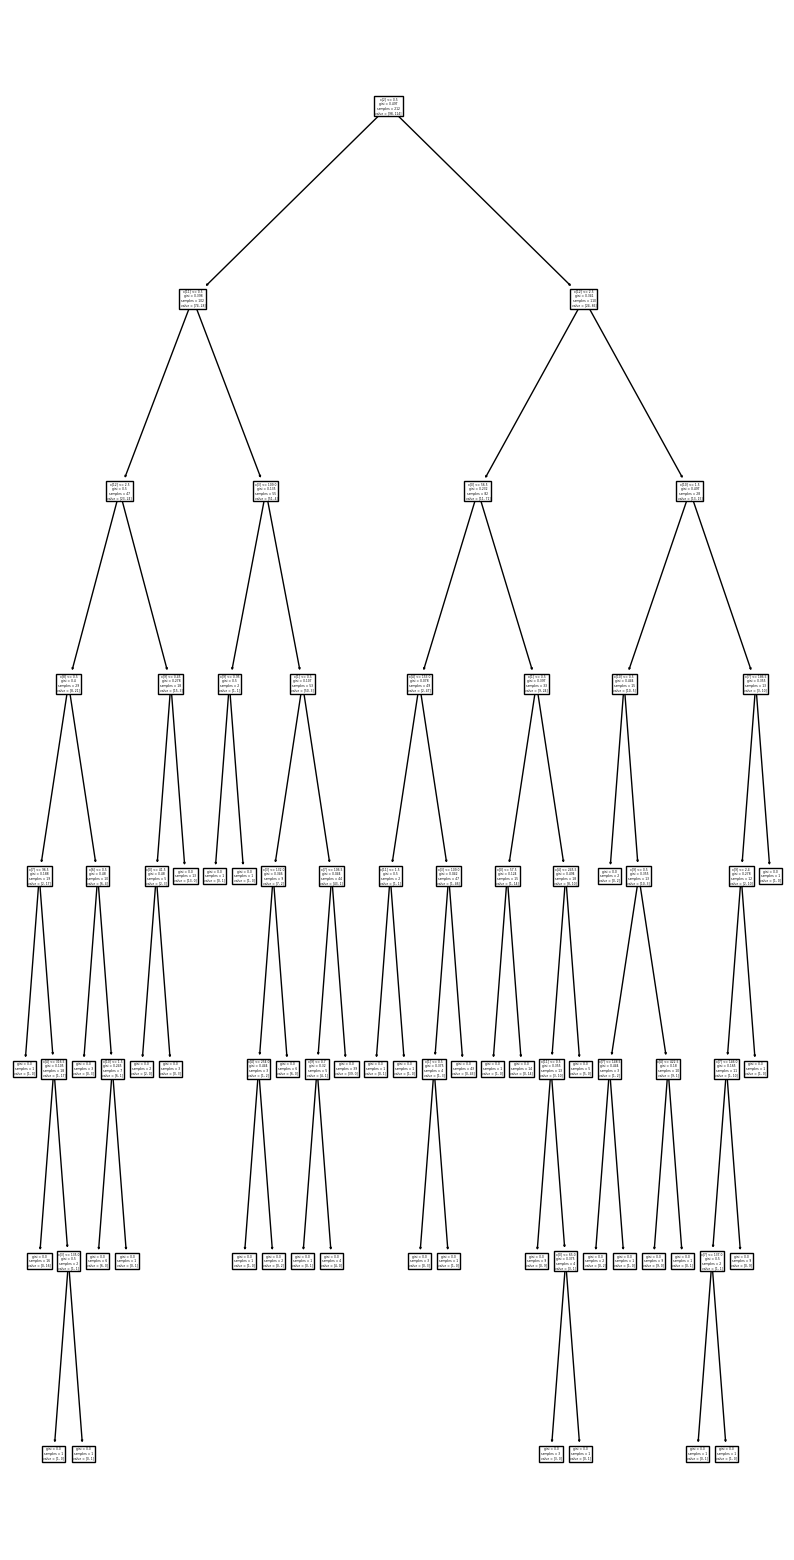

In [23]:
fig=plt.subplots(figsize=(10,20))
tree.plot_tree(clf)
plt.show()


In [24]:
#demonstrating max depth
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1=pd.DataFrame(columns=['max_depth','acc_score'])
for i in c_parameter_values:
    model=tree.DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train)
    predicted=model.predict(x_test)
    accuracy=accuracy_score(y_test,predicted)
    df1=df1.append({'max_depth':i,'acc_score':accuracy},ignore_index=True)
print(df1)    

    max_depth  acc_score
0         1.0   0.769231
1         2.0   0.791209
2         3.0   0.846154
3         4.0   0.791209
4         5.0   0.802198
5         6.0   0.824176
6         7.0   0.824176
7         8.0   0.835165
8         9.0   0.813187
9        10.0   0.824176
10       11.0   0.824176
11       12.0   0.824176
12       13.0   0.813187
13       14.0   0.835165
14       15.0   0.824176


C:\Users\hp\AppData\Local\Temp\ipykernel_7572\1458129571.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'max_depth':i,'acc_score':accuracy},ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7572\1458129571.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'max_depth':i,'acc_score':accuracy},ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7572\1458129571.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({'max_depth':i,'acc_score':accuracy},ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7572\1458129571.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [25]:
max_accu=df1['acc_score'].max()
df2=df1[df1['acc_score']==max_accu]

In [26]:
df2

,max_depth,acc_score
2,3.0,0.846154


In [27]:
param_dict={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7]}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid=GridSearchCV(clf,param_grid=param_dict,cv=10,n_jobs=-1)

In [31]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]})

In [33]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [42]:
grid.best_score_

0.7683982683982683

In [34]:
m1=tree.DecisionTreeClassifier(criterion='gini',max_depth=3)

In [37]:
m1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
test_pred1=m1.predict(x_test)

In [40]:
accuracy_score(y_test,test_pred1)

0.8461538461538461